# Assignment 2. Simple Agents

An **agent** is anything that can perceive its environment through sensors, and act upon that environment through actuators based on its **agent program**

Our goal is to design an **agent program (AP)** that implements *the agent function: the mapping from percepts to actions*.

We assume this AP will run on some sort of computing device with physical sensors and actuators: we call this the architecture

An *AP takes the current percept as input* from the sensors and `returns an action` to the actuators.

The AP takes just the current percept as input because nothing more is available from the environment; if the agent's actions depend on the entire percept sequence, the agent will have to remember the percept.

## A table-driven agent

A table-driven AP *keeps track of the percept sequence and then uses it to index into a table of actions* to decide what to do.

The table represents explicitly the agent function that the agent program embodies.

### The 2-state vacuum world example

In the 2-state vacuum world, the *table* would consist of *all the possible states* of the agent.

We will now create a table-driven AP for our 2-state environment.

In [1]:
import random
import collections

In [6]:
# These are the two locations for the two-state environme
from src.locations import *

In [7]:
print(loc_A, loc_B)

(0, 0) (1, 0)


In [9]:
table =     {((loc_A, 'Clean'),): 'Right',
             ((loc_A, 'Dirty'),): 'Suck',
             ((loc_B, 'Clean'),): 'Left',
             ((loc_B, 'Dirty'),): 'Suck',
             ((loc_A, 'Dirty'), (loc_A, 'Clean')): 'Right',
             ((loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
             ((loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck',
             ((loc_B, 'Dirty'), (loc_B, 'Clean')): 'Left',
             ((loc_A, 'Dirty'), (loc_A, 'Clean'), (loc_B, 'Dirty')): 'Suck',
             ((loc_B, 'Dirty'), (loc_B, 'Clean'), (loc_A, 'Dirty')): 'Suck'
            }
        #......

In [10]:
table

{(((0, 0), 'Clean'),): 'Right',
 (((0, 0), 'Dirty'),): 'Suck',
 (((1, 0), 'Clean'),): 'Left',
 (((1, 0), 'Dirty'),): 'Suck',
 (((0, 0), 'Dirty'), ((0, 0), 'Clean')): 'Right',
 (((0, 0), 'Clean'), ((1, 0), 'Dirty')): 'Suck',
 (((1, 0), 'Clean'), ((0, 0), 'Dirty')): 'Suck',
 (((1, 0), 'Dirty'), ((1, 0), 'Clean')): 'Left',
 (((0, 0), 'Dirty'), ((0, 0), 'Clean'), ((1, 0), 'Dirty')): 'Suck',
 (((1, 0), 'Dirty'), ((1, 0), 'Clean'), ((0, 0), 'Dirty')): 'Suck'}

In [12]:
a=[] #assume that this is a percept sequence
a.append(((1, 0), 'Clean')) # add a new percept
print(tuple(a))

(((1, 0), 'Clean'),)


Let's add the class **Thing**  - a base class represents ANY physical object that can appear in ANT Environment

In [24]:
from src.thingClass import Thing

In [25]:
thing0=Thing()
print(thing0)
print(thing0.is_alive())
print(thing0.show_state())

<Thing>
False
I don't know how to show_state.
None


Now we need to add the **Agent**  - *subclass of a base Thing* class

It has one required slot (attribute), *.program*, which reperesents *Agent Program* (the Core of Agent's logic).

Agent Program should hold a function that takes one argument, the *Percept*, and returns an *action*.

!!! Note that `.program` is a slot, not a method.

If it were a method, then the program could 'cheat' and look at aspects of the agent.
It's not supposed to do that: the program can only look at the percepts


There is an optional slot, `.performance`, which is a number giving the performance measure of the agent in its environment.


In [27]:
from src.agentClass import Agent

For the easiest example let's implement the `Random Agent Program` to choose an action at random, ignoring all percepts

In [28]:
def RandomAgentProgram(actions):
   return lambda percept: random.choice(actions)

In [29]:
actionList = ['Right', 'Left', 'Suck', 'NoOp']
f=RandomAgentProgram(actionList)
for i in range(5):
    print(f('111'))

Right
NoOp
Right
NoOp
Right


Next, we try to implement the **Random Agent** - the `Agent instance` that randomly choose one of the actions from the vacuum environment (our *actionList*)

In [30]:
def RandomVacuumAgent():
    return Agent(RandomAgentProgram(actionList))

In [33]:
a1=RandomVacuumAgent()
print(f"{a1} has the performance: {a1.performance}")
for i in range(5):
  print(a1.program('111'))

<Agent> has the performance: 0
Suck
Left
Right
Suck
Right


Now we need to add the class **Environment** - *a base class* representing a abstract Environment.
* The environment keeps a list of *.agents*.
* Each agent has a *.performance* slot, initialized to 0.

!!! 'Real' Environment classes must inherit from this one.

Our **TrivialVacuumEnvironment** has 2 locations, A and B
These are the 2 locations for the 2-state environment.

* Each can be Dirty or Clean. 
* The agent perceives its location and the location's status. 


This serves as an example of how to implement a simple Environment for the further assignment tasks.

How to **track performance**?

Score 10 for each dirt cleaned; -1 for each move.

In [74]:
from src.trivialVacuumEnvironmentClass import TrivialVacuumEnvironment

In [75]:
e1 = TrivialVacuumEnvironment()
# Check the initial state of the environment
print("State of the Environment: {}.".format(e1.status))

State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.


### Random Agent Template

Create our Random Agent now.

This agent will choose any of the actions from 'Right', 'Left', 'Suck' and 'NoOp' (No Operation) randomly.

In [76]:
a1=RandomVacuumAgent()

Add our agent (a1) to our environment instance (e1).

In [77]:
e1.add_thing(a1)
print("RandomVacuumAgent is located at {}.".format(a1.location))

Agent is starting in random location...
RandomVacuumAgent is located at (1, 0).


Let's run our environment(e1) for 1 step

In [78]:
# Running the environment for 1 step
e1.step()

# Check the current state of the environment
print("State of the Environment: {}.".format(e1.status))

print("RandomVacuumAgent is located at {}.".format(a1.location))

Agent percepted ((1, 0), 'Dirty').
Agent decided to do NoOp.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
RandomVacuumAgent is located at (1, 0).


Let's try running the environment for the lifecircle

In [79]:
e1.run()

step 1:
Agent percepted ((1, 0), 'Dirty').
Agent decided to do Right.
Agent <Agent> is dead.
We can't find a live agent


In [80]:
e1.status == {(1,0):'Clean' , (0,0) : 'Clean'}

False

In [81]:
#prev.version of our random agent is almost immortal :))
a1.performance

-1

In [82]:
a1.location

(1, 0)

In [83]:
e2=TrivialVacuumEnvironment()
a2=RandomVacuumAgent()

e2.add_thing(a2)

print("State of the Environment: {}.".format(e2.status))
print("RandomVacuumAgent is located at {}.".format(a2.location))

Agent is starting in random location...
State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.
RandomVacuumAgent is located at (1, 0).


In [84]:
e2.run()

step 1:
Agent percepted ((1, 0), 'Clean').
Agent decided to do Suck.
step 2:
Agent percepted ((1, 0), 'Clean').
Agent decided to do Left.
Agent <Agent> is dead.
We can't find a live agent


### Task1. Random Agents

1. By using the Agent class creating your first random agent - a radom operating *Cat*.

Available actions: 
* MoveRight, 
* MoveLeft, 
* Eat, 
* Drink, 
* Fight

The Cat will do whatever it wants (based on its random choice) regardless of its location and what is there.


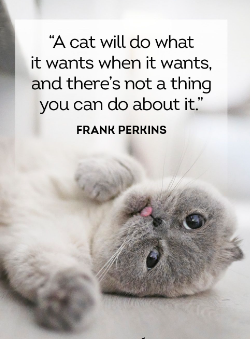

2. The House has 5 rooms, arranged in a row - your environment

There are 3 things in the house: a Mouse, Milk, and a Dog.

The things are placed randomly in the House.

But if (by acident) a Mouse and Milk are placed in the same room, only a Mouse will stay there (since it will drink a Milk - the process of 'drinking milk by a mouse is not supposed to be implemented in this task'), so you will have 2 things instead of 3 in the House.

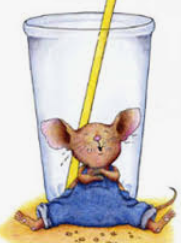

If a Mouse and a Dog are in the same room, the Mouse is needed to be moved to the previos or next room (prev. or next - select randomly).

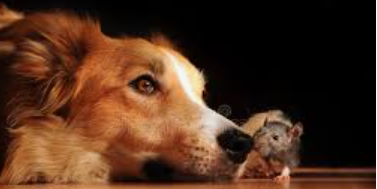

A Dog and Milk can be in the same room.

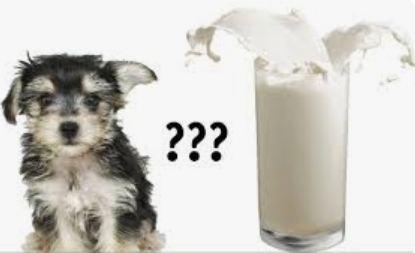

3. Create the *CrazyHouse* environment (Place things accordingly to the rule above.)

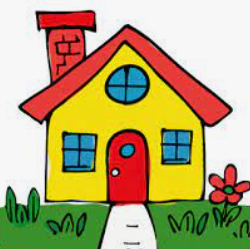

4. Place the Cat in the random room.

* If the Cat drinks milk, the performance will be increased by 5.

* If the Cat eats a Mouse, the performance will be increased by 10. But to eat a Mouse the Cat must catch it. Only strong Cat can do that. If the performance < 3 the Cat is weak and can't catch a Mouse while in the same room with it (the performance doesn't change in this case).

* Each movement -> perfomace -1

* If the Cat fights a Dog and wins (only super strong Cat, with performance>=10, can do that) the performance will be increased by 20. Otherwise a Dog wins and a Cat loose its strength (perfomace -10).

* If the perfomace <=0 ....see above...GAME OVER!

Run your Crazy House ⚡ 💯

### A table-driven agent template

First, we need to develop Table Driven AP (implemented as `TableDrivenAgentProgram` function)

Such agent selects an action based on the percept sequence.

!!! To customize it, provide as table a dictionary of all *{percept_sequence:action}* pairs.

In [85]:
from src.agentPrograms import TableDrivenAgentProgram

In [86]:
table

{(((0, 0), 'Clean'),): 'Right',
 (((0, 0), 'Dirty'),): 'Suck',
 (((1, 0), 'Clean'),): 'Left',
 (((1, 0), 'Dirty'),): 'Suck',
 (((0, 0), 'Dirty'), ((0, 0), 'Clean')): 'Right',
 (((0, 0), 'Clean'), ((1, 0), 'Dirty')): 'Suck',
 (((1, 0), 'Clean'), ((0, 0), 'Dirty')): 'Suck',
 (((1, 0), 'Dirty'), ((1, 0), 'Clean')): 'Left',
 (((0, 0), 'Dirty'), ((0, 0), 'Clean'), ((1, 0), 'Dirty')): 'Suck',
 (((1, 0), 'Dirty'), ((1, 0), 'Clean'), ((0, 0), 'Dirty')): 'Suck'}

Let's create the instance of TD AP for our vacuum world

In [90]:
tdAP1=TableDrivenAgentProgram(table)

Next, we need to check AP

In [91]:
print(tdAP1((loc_A,'Clean')))
print(tdAP1((loc_B,'Dirty')))

Right
Suck


Well, we are ready to create TableDrivenVacuumAgent.

In [95]:
def TableDrivenVacuumAgent():
     return Agent(program=TableDrivenAgentProgram(table=table))

In [96]:
tdA1=TableDrivenVacuumAgent()

In [98]:
isinstance(tdA1, Agent)

True

In [97]:
print(tdA1.program((loc_A, 'Dirty')))

Suck


Then, we are placing our new TD Agent's instance (tdA1) into our environment (new instance - e3)

In [99]:
e3 = TrivialVacuumEnvironment()

In [100]:
e3.add_thing(tdA1)

Agent is starting in random location...


In [102]:
print("State of the Environment: {}.".format(e3.status))
print("Agent is located at {}.".format(tdA1.location))

State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
Agent is located at (1, 0).


In [104]:
e3.agents

[<Agent>]

In [105]:
e3.agents[0].location

(1, 0)

In [106]:
# Running the environment for 1 step
e3.step()

Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.


In [107]:
e3.run()

step 1:
Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.
step 2:
Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.
step 3:
Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.
step 4:
Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.
step 5:
Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.
step 6:
Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.
step 7:
Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.
step 8:
Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.
step 9:
Not such percept sequence in my table
Agent percepted ((1, 0), 'Clean').
Agent decided to do None.
step 10:
Not such percept sequence in

In [108]:
e3.status == {(1,0):'Clean' , (0,0) : 'Clean'}

True

### Task2. Table-driven Agents

Steps:

1. Implement the base class Food to store weight and calories. And 2 derived classes Milk and Sausage. Calories are the same any instance accordingly to kind of food, but weight is different for instances.

2. Implemet the class Agent-Cat by using the Agent class. Agent-Cat can eat and drink. And its performance changes depending on weight and calories of the food. It is necessary to check the type of food in order to apply the appropriate method (The Agent-Cat can't drink an instance of Sausage).

3. Implement the environment - **Cat-Friendly-House** - has 3 rooms in a row.

4. Place a one instance of Milk and a one of instance of Sausage in random room (but not in the same).

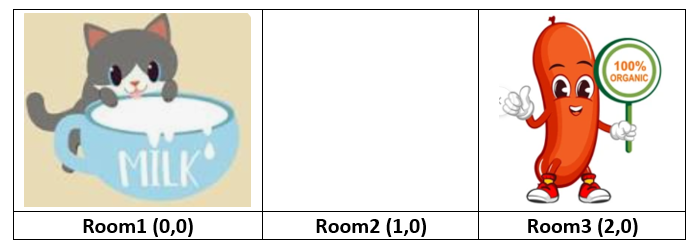

4. The status of the environment - unknown. But the *.percept* method of this class should set the state of the room based on the kind of instance located there. And it should return the info about status of the current agen't location as it is in our TrivialVacuumEnvironment. The state of the room is 'MilkHere'/'SausageHere' (if it contains any instance of the Food) or 'Empty'.

5. Place the Agent-Cat in random room.

6. If the Agent-Cat eats or drinks its performance changes (see 2. above). 
7. Each movement -> perfomace -1
8. Available actions: *MoveRight, MoveLeft, Drink, Eat*.
9. Design and fill the look-up table, for ex.

`feedingRules={((room1, 'Empty'),): 'MoveRight', ((room2, 'Empty'),): 'MoveRight', ((room3, 'Empty'),): 'MoveLeft', ((room1, 'MilkHere'),): 'Drink', ((room1, 'SausageHere'),): 'Eat', ....... ((room1, 'MilkHere'), (room1, 'Empty')): 'MoveRight', ...... ((room1, 'Empty'), (room2, 'SausageHere'), (room2, 'Empty')): 'MoveRight', .....}`

The look-up table is stored in the separate file 
10. Run the simulation by creating a *House* with food, and our *Agent-Cat*

## Simple reflex agents

These agents *select actions on the basis of the **current** percept, ignoring the rest of the percept history*.

These agents work on a **condition-action rule** (also called situation-action rule, production or if-then rule), which *tells the agent the action to trigger when a particular situation is encountered*.

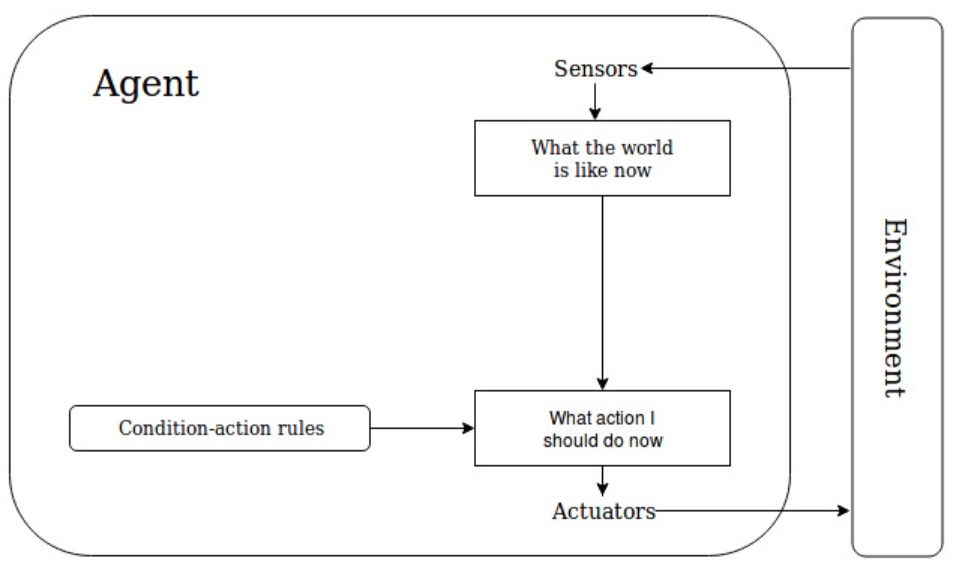

A general and flexible approach is `first to build a general-purpose interpreter` for condition–action rules and `then to create rule sets` for specific task environments

The structure of this general program in schematic form --> below, showing how the condition–action rules allow the agent to make the connection from percept to action:

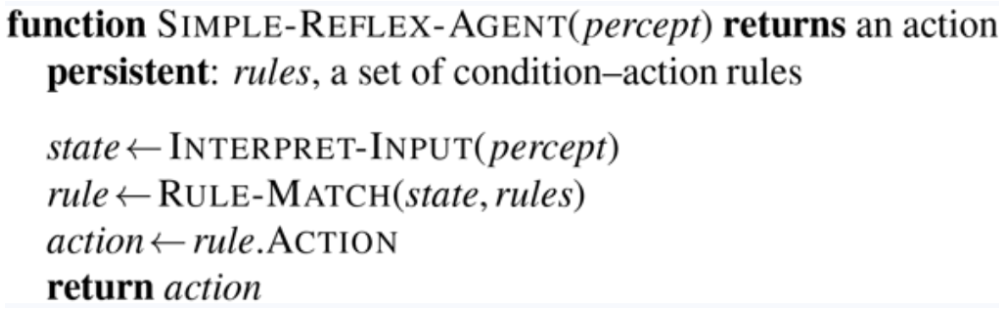

In [109]:
def SimpleReflexAgentProgram(rules, interpret_input):
    #This AP takes action based solely on the percept.

    def program(percept):
        state = interpret_input(percept)
        rule = rule_match(state, rules)
        action = rule.action
        return action

    return program

If condition–action rules stored as a Python Dictionary

`rules={((0, 0), 'Dirty'): 'Suck',
        (((1, 0), 'Dirty'): 'Suck',
        (((0, 0), 'Clean'): 'Right',
        (((1, 0), 'Clean'): 'Left',
        }`



In [110]:
def rule_match(state, rules):
  for key in rules:
    if state in key:
      return rules[key]
  

In [112]:
def interpret_input(percept):
  loc, status = percept
  return status

### 2-location vacuum environment example

The agent program for a simple reflex agent in the two-location vacuum environment.

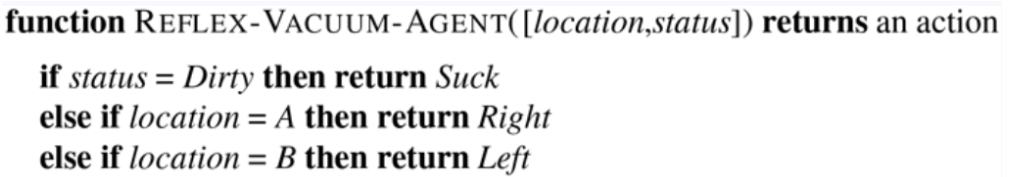

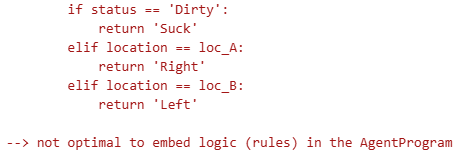

In [113]:
rules={((0, 0), 'Dirty'): 'Suck', ((1, 0), 'Dirty'): 'Suck', ((0, 0), 'Clean'): 'Right',((1, 0), 'Clean'): 'Left'}
rules

{((0, 0), 'Dirty'): 'Suck',
 ((1, 0), 'Dirty'): 'Suck',
 ((0, 0), 'Clean'): 'Right',
 ((1, 0), 'Clean'): 'Left'}

In [114]:
percept=(loc_A,'Dirty')
percept

((0, 0), 'Dirty')

In [116]:
state=interpret_input(percept)
state

'Dirty'

In [117]:
rule_match(state, rules)

'Suck'